## Analysis of pandemic dynamics assuming SIR-like evolution
### Carlos Ignacio Herrera-Nolasco$^{1}$, Marco Arieli Herrera-Valdez$^{1}$
#### $^{1}$ Laboratorio de Fisiología de Sistemas, Facultad de Ciencias, UNAM


### Epidemic dynamics 

Assume that the population is divided in three subsets representing the non-infected and susceptible, the infected, and those that can no-longer participate in the chain of infections due to immunity or death. 
Let the densities of those subpopulations be represented by $x$, $y$, and $z$ respectively, with $1=x+y+z$. As a consequence,  $\partial_t x = -\partial_t y - \partial_t z$. Let  $\alpha$ represent the infection rate given an infectious contact, and $\tau$ the average waiting time until an individual is no longer infected. The dynamics for $y$ can be written as 
\begin{equation}
\partial_t y = \alpha y \bigg( 1- z - y \bigg) - \beta y,
\end{equation}
and the evolution for $z$ is then
\begin{equation}
\partial_t z = \beta y
\end{equation}

The incidence of cases is the number of new infected. From the equation for the change in $y$, the incidence is given by  $$f(y,z;\alpha) =\alpha y \bigg( 1- z - y \bigg),$$ which means that the incidence in the SIR model is a cuadratic function of the prevalence, but it also depends on $z$, the density of no-longer infected people. Since $z$ is an increasing function, then the graph of the incidence can be thought of as a curve in 3D space with quadratic shape. 


#### Parameters for modeling 
If $\gamma$ is the rate of removal by recovery and acquisition of immunity and $\delta$ is the fatality rate due to infection, we can try to obtain the parameters for the model from the data. To do so, consider the equation for $z$ to obtain,
\begin{equation}\beta = \frac{\partial_t z}{y},\end{equation} 
and also 
\begin{equation}\alpha = \frac{\partial_t y + \partial_t z}{y \bigg( 1 -z - y  \bigg)}. \end{equation} 
The problem is then to link the data to the variables $y$ and $z$.

### Linking the data to the modeling variables 

If $h$ is the time step for sampling, let $Y_{n}$ represent the number of cases at time $t=nh$. Note that $Y_n$ may be thought of in terms of the density of cases $y_n$. Explicitly, $y_n = Y_n/T $ here $T$ is the size of the local population.  From data, the cumulative number of cases at step $nh$ can be written as 
$$C_{n} = \sum_{k=0}^{n} Y_k$$
which means that the number of new cases (incidence) at time nh is 
$$Y_n = C_n - C_{n-1}.$$
The cumulative recoveries and deaths are 
$$Z_n = R_{n}+D_{n}.$$
The incidence is then 
$$C_n - R_n - D_n$$

#### Parameters for modeling 
We can try to obtain the parameters for the model from the data by approximated by substitution of the discrete differences 
$$
\partial_t y \approx \frac{u(t+h)-u(t)}{h},  \quad u \in \left\{Y,Z \right\}
$$
The parameters $\alpha$ and $\beta$ can then be estimated from the data. 


In [4]:
#import sys
#sys.path.insert(1, './')
#print(sys.path)
from dam_COVID19_baseCode import *
np.seterr(divide='ignore')
np.seterr(all='ignore')
import matplotlib.pylab as gr
small={'family' : 'normal','weight' : 'normal','size'   : 8}
medium={'family' : 'normal','weight' : 'normal','size'   : 10}
large={'family' : 'normal','weight' : 'bold','size'   : 13}
gr.rc('font', size=small['size'], weight='normal')          # controls default text sizes
gr.rc('axes', titlesize=medium['size'])     # fontsize of the axes title
gr.rc('axes', labelsize=medium['size'])    # fontsize of the x and y labels
gr.rc('xtick', labelsize=small['size'])    # fontsize of the tick labels
gr.rc('ytick', labelsize=small['size'])    # fontsize of the tick labels
gr.rc('legend', fontsize=small['size'])    # legend fontsize
gr.rc('figure', titlesize=large['size'])  # fontsize of the figure title
%matplotlib inline 

Data obtained from http://187.191.75.115/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip
Data obtained from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Data obtained from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Data obtained from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv


In [5]:
dMexico = openCSV_DB(path=datosAbiertosCovid19Mexico,comp='zip',enc='latin-1')
cases, deathCases,recovCases = getCSSEGISandData(urlData=1)

Data obtained from http://187.191.75.115/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip
Data obtained from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Data obtained from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Data obtained from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv


In [7]:
cases.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,678,712,726,736,750,766,773,782,789,795
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,731,738,738,743,743,743,745,745,747,748
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,25,25,26,27,27,27,27,30,35,35
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,24,24,24,24,24,24,24,25,25,25
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,3607,3780,3892,4003,4127,4285,4428,4532,4681,4783
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,1596,1677,1746,1808,1867,1932,2066,2148,2273,2386
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,105,106,106,106,106,106,106,106,106,106
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,2982,2994,3002,3004,3016,3016,3025,3030,3035,3033


In [8]:
# ------------------------------
# Description of the data so that the headers and the columns
# without case data are distinguished
# ------------------------------
nRows,nCols=cases.shape
cases.head(10)
nHeaderRows=1;
#
nHeaderCols=3
# how to generate date lists from a baseline using the datetime
dates = cases.columns[4:]
nDays = len(dates)
days = np.arange(nDays)
print('Got data from %d days between %s and %s'%(nDays,dates[0],dates[-1]))
# -------------------
print("""""")
# -------------------
npCases = cases.to_numpy()
countries = np.unique(npCases[:,1])
nCountries = len(countries)
print('Considering data from {d} countries'.format(d=nCountries))
# -------------------
# Sum the counts from each country and construct a new array
# -------------------
# These arrays have the same size as the countries array (unique countries)
totCases=gatherDataByCountry(df=cases,nHeaderCols=4)
totDeathCases=gatherDataByCountry(df=deathCases,nHeaderCols=4)
totRecovCases=gatherDataByCountry(df=recovCases,nHeaderCols=4)
# Save all into a dictionary
G = {'cCases':totCases.transpose(), 'cDeaths':totDeathCases.transpose(),'cRecovs':totRecovCases.transpose(), 'countries':countries.transpose()}
# -------------------
# Search regions to illustrate the case-fatality ratios
# -------------------
Pops_Millions = {'Algeria':43851044, 'Argentina':45195774,'Australia':25499884,'Belgium':11433256,
                 'Brazil':212559417, 
                 'Canada':37742154, 'China':1439323776, 'Colombia':50882891,'Egypt':102334404,
                 'France':67886011,'Germany':83783942, 'Japan':126476461,'Korea, South':51269185,
                 'Indonesia':273523615, 'Iran':83992949,'Israel':8655535,'Italy':60461826,
                 'Mexico':128932753, 'Niger':24206644, 'Singapore':5850342, 
                 'South Africa':59308690,'Spain':46754778,
                 'United Kingdom':67886011, 'US':331002651, 'Venezuela':28870195}

Got data from 103 days between 1/22/20 and 5/3/20

Considering data from 187 countries


In [9]:
print(type(totCases))
print(totCases.shape)

<type 'numpy.ndarray'>
(103, 187)


#### Parabola describing the incidence as a function of the cases

In [100]:
def getSingleCountryData(G, popSize, cou,b = 0.002):
    cInd = np.where(G['countries']==cou)[0][0]
    cases= np.float64(G['cCases'][cInd,:])
    recovs= np.float64(G['cRecovs'][cInd,:])
    deaths= np.float64(G['cDeaths'][cInd,:])
    Z = recovs+deaths
    country= {'cCases':cases,'cDeaths':deaths,'cRecovs':recovs, 'Z':Z}
    prevalenceNet = np.zeros(len(cases))
    prevalenceNet[1:]= country['cCases'][1:]- country['cCases'][:-1]
    prevalence = prevalenceNet/popSize[cou]
    print(deaths.shape)
    country.update({'popSize':popSize[cou], 'cdCases':cases/popSize[cou], 'cdDeaths':deaths/popSize[cou], 'cdRecovs':np.divide(recovs,popSize[cou]), 'z':np.divide(Z,popSize[cou]),'prevalence':prevalence,'prevalenceNet':prevalenceNet,'name':cou})
    return country
    
def dataSIR_Country(country,a=80,b=0.0002):
    # Prevalence time series
    # The time series of cumulative cases without cumulative recovs and without deaths
    country['a']=a; country['b']=b
    # "Prevalence" of deaths and recoveries 
    z = country['cdRecovs'] + country['cdDeaths']
    Z = country['cRecovs'] + country['cDeaths']
    Y = country['prevalenceNet'] 
    y = country['prevalence'] 
    dY=np.zeros(len(Y)); dY[1:]= Y[1:]-Y[:1]
    dZ=np.zeros(len(Z)); dZ[1:]= Z[1:]-Z[:1]
    dy=np.zeros(len(y)); dy[1:]= y[1:]-y[:1]
    dz=np.zeros(len(z)); dz[1:]= z[1:]-z[:1]
    incidenceNet = dY+dZ
    incidence = dy+dy
    x = 1-z-y
    country.update({'x':x, 'y':y, 'z':z,  'incid':incidence,'Z':Z,'dy':dy,'dz':dz,'dY':dY,'dZ':dZ})
    country['beta']= np.divide(incidence,x*y)
    country['alpha']=np.divide(dz,x*y)
    country['R_t']= np.divide(incidence,dz)
    country['fy'] = a*y* (1-z -y) 
    country['Deltay']= a*y*(1-z -y-b) 
    return country


In [101]:
def plotDataPhasePortraits(country,densities=1):
    ff =gr.figure(figsize=(17,5)); gr.ioff(); rows=1; cols=3
    ax1= ff.add_subplot(rows,cols,1); tax1= ax1.twinx()
    ax2= ff.add_subplot(rows,cols,2); #tax2= ax2.twiny()
    ax3= ff.add_subplot(rows,cols,3); tax3= ax3.twinx()
    tax1.plot(days, country['R_t'],'o',markeredgecolor='blue', markerfacecolor='white',label=r'$y_k$')
    tax1.plot([days[0],days[-1]], [1,1],'k:')
    prev= country['y']
    dea = country['cdDeaths']
    rec = country['cdRecovs']
    z = country['z']
    maxY=1.1*prev.max()
    ax1.plot(days, prev,'b.',label=r'$R_t =\alpha (1-z-y)/\beta$')
    ax1.plot(days, dea,'.',label=r'$D_k$')
    ax1.plot(days, rec,'.',label=r'$R_k$')
    ax1.plot(days, z,'.',label=r'$Z_k=D_k + R_k$')
    ax2.plot(country['fy'],prev,'o',markeredgecolor='orange', markerfacecolor='white',label=r'$f(y)= %g y (%g-y)$'%(country['a'],country['b']))
    ax2.plot(country['incid'],prev,'.',color='blue')
    ax2.plot([0,0],[0,prev.max()],'k:')
    ax2.plot([0,0],[0,prev.max()],'k:')
    ax3.plot(days,country['alpha'],'.',color='blue',label=r'$\alpha$')
    tax3.plot(days,country['beta'],'.',color='orange',label=r'$\beta$')
    ax1.set_xlabel(r'$t$ (days)');ax2.set_xlabel(r'$\partial_t y$'); ax3.set_xlabel(r'$t$ (days)');
    ax1.set_ylabel(r'$y_k$');ax2.set_ylabel(r'$y_k$')
    ax1.legend(loc='center left'); tax1.legend(loc='upper left')
    ax1.set_ylim(0,maxY); ax2.set_ylim(0,maxY); tax1.set_ylim(0,10); 
    ax3.set_ylim(0,10);     tax3.set_ylim(0,1)
    #ax2.set_xlim(-0.0001,maxXPP.max())
    ax2.legend(loc='lower right'); 
    ax3.legend(loc='upper left'); tax3.legend(loc='center left'); 
    gr.ion(); gr.draw()
    fN= '../figures_COVID19_dataAnalysis/dam_COVID19_JHU_phasePlane_%s.png'%country['name']
    ff.suptitle('Phase plane, %s'%country['name'])
    ff.subplots_adjust(left=0.075,bottom=0.075,right=0.9,top=0.9,wspace=0.2,hspace=0.25)
    ff.savefig(fN)
    print('Saving file to %s'%fN)
    return ff

Examples of phase plane dynamics

(103,)
Saving file to ../figures_COVID19_dataAnalysis/dam_COVID19_JHU_phasePlane_Italy.png


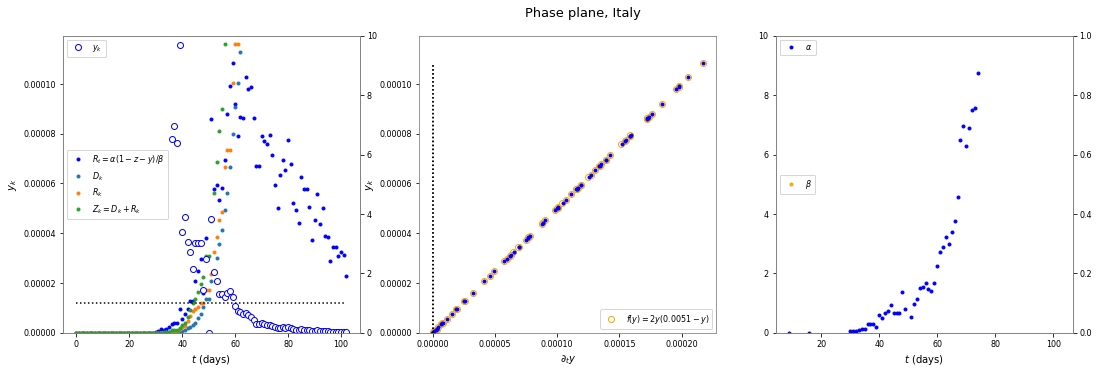

In [91]:
Italy= getSingleCountryData(G, popSize= Pops_Millions, cou='Italy')
Italy= dataSIR_Country(country=Italy,a=2, b= 0.0051)
fItaly= plotDataPhasePortraits(Italy)

(103,)
Saving file to ../figures_COVID19_dataAnalysis/dam_COVID19_JHU_phasePlane_France.png


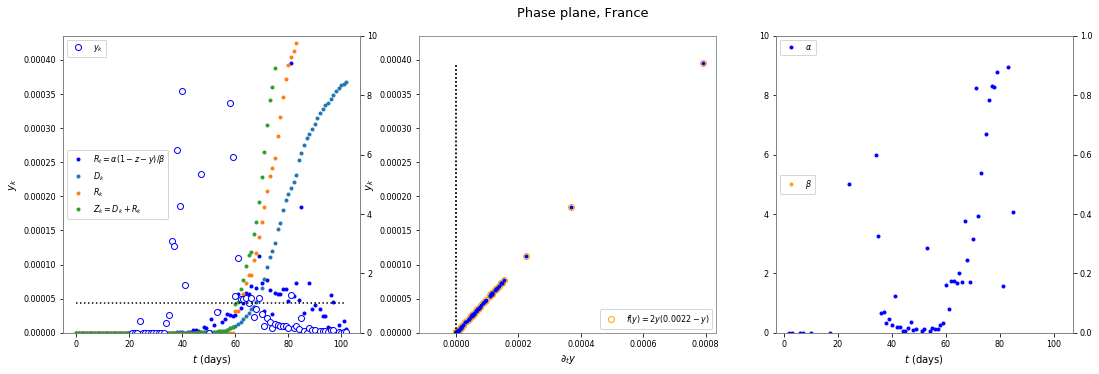

In [93]:
France= getSingleCountryData(G, popSize= Pops_Millions, cou='France')
France= dataSIR_Country(country=France,a=2, b= 0.0022)
fFrance= plotDataPhasePortraits(France)

(103,)
Saving file to ../figures_COVID19_dataAnalysis/dam_COVID19_JHU_phasePlane_US.png


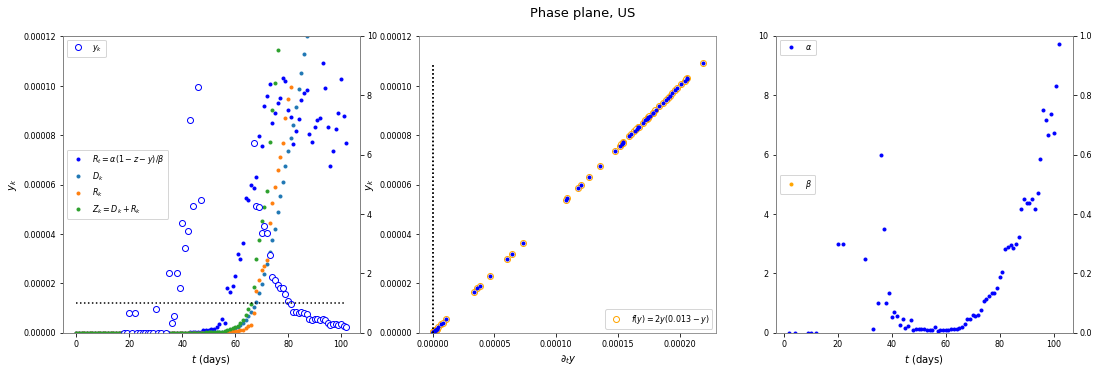

In [94]:
US= getSingleCountryData(G, popSize= Pops_Millions, cou='US')
US= dataSIR_Country(US,a=2, b= 0.013)
fUS= plotDataPhasePortraits(US)

(103,)
Saving file to ../figures_COVID19_dataAnalysis/dam_COVID19_JHU_phasePlane_Spain.png


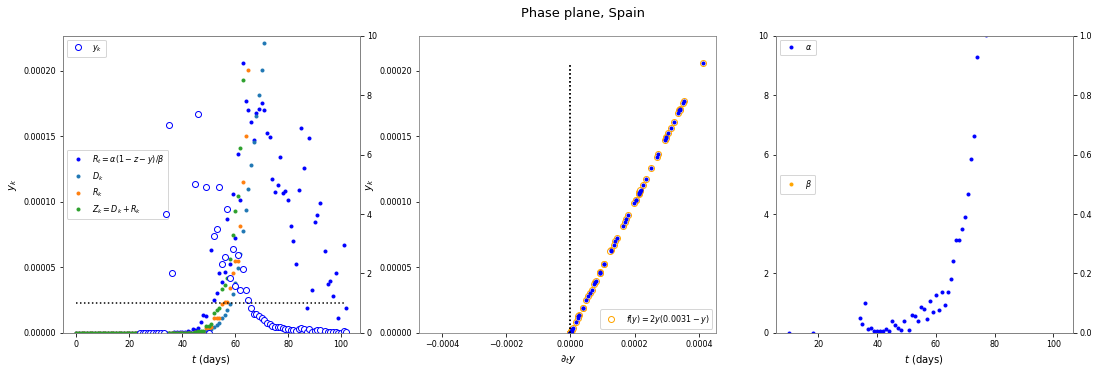

In [95]:
Spain= getSingleCountryData(G, popSize= Pops_Millions, cou='Spain')
Spain= dataSIR_Country(Spain,a=2, b= 0.0031)
fSpain= plotDataPhasePortraits(Spain)

(103,)
Saving file to ../figures_COVID19_dataAnalysis/dam_COVID19_JHU_phasePlane_Belgium.png


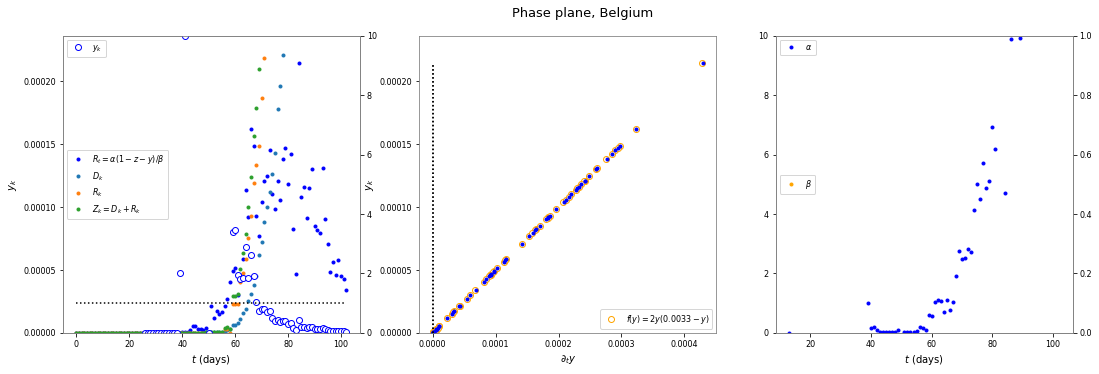

In [96]:
Belgium= getSingleCountryData(G, popSize= Pops_Millions, cou='Belgium')
Belgium= dataSIR_Country(Belgium,a=2, b= 0.0033)
fBelgium= plotDataPhasePortraits(Belgium)

(103,)
Saving file to ../figures_COVID19_dataAnalysis/dam_COVID19_JHU_phasePlane_China.png


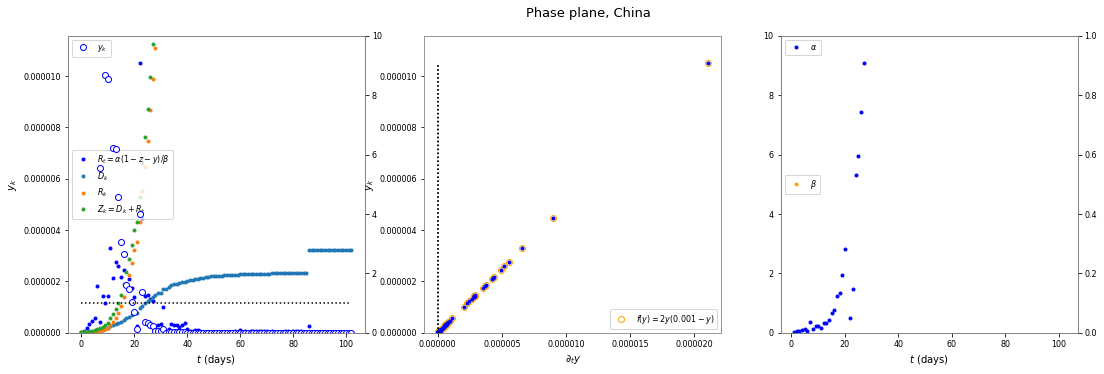

In [97]:
China= getSingleCountryData(G, popSize= Pops_Millions, cou='China')
China= dataSIR_Country(China,a=2, b= 0.001)
fChina= plotDataPhasePortraits(China)

(103,)
Saving file to ../figures_COVID19_dataAnalysis/dam_COVID19_JHU_phasePlane_Germany.png


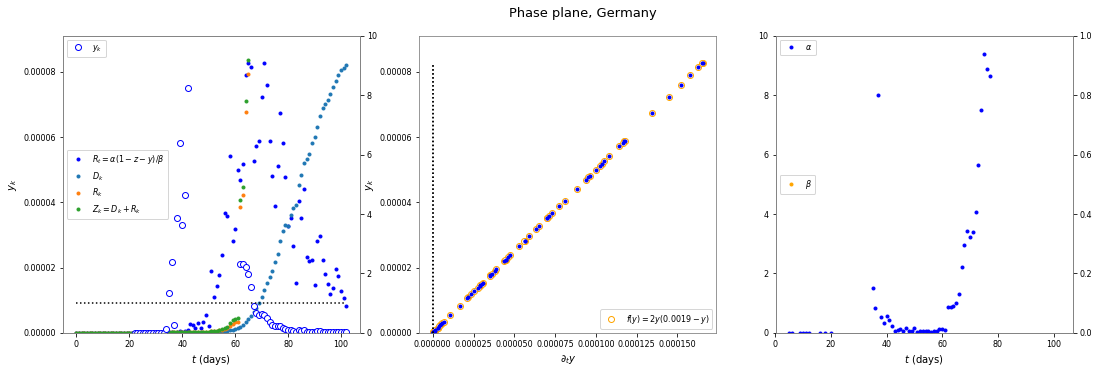

In [98]:
Germany= getSingleCountryData(G, popSize= Pops_Millions, cou='Germany')
Germany= dataSIR_Country(Germany,a=2, b= 0.0019)
fGermany= plotDataPhasePortraits(Germany)

(103,)
Saving file to ../figures_COVID19_dataAnalysis/dam_COVID19_JHU_phasePlane_Korea, South.png


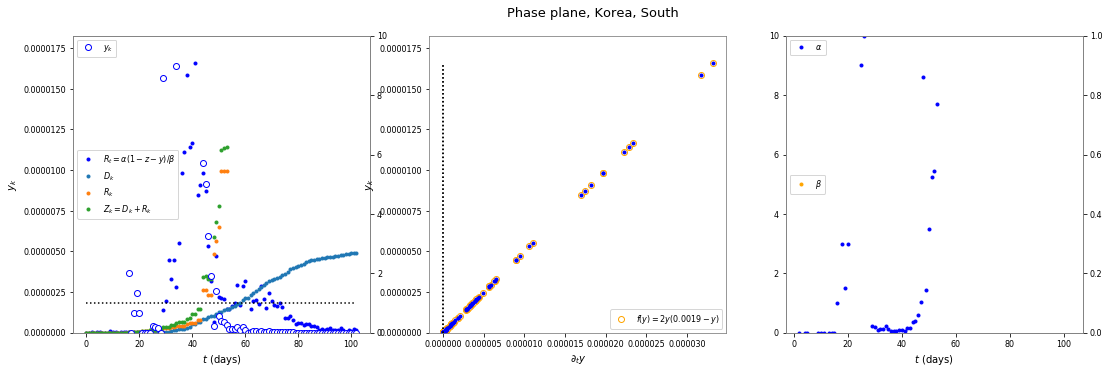

In [99]:
SK= getSingleCountryData(G, popSize= Pops_Millions, cou='Korea, South')
SK= dataSIR_Country(SK,a=2, b= 0.0019)
fSK= plotDataPhasePortraits(SK)

(103,)
Saving file to ../figures_COVID19_dataAnalysis/dam_COVID19_JHU_phasePlane_Mexico.png


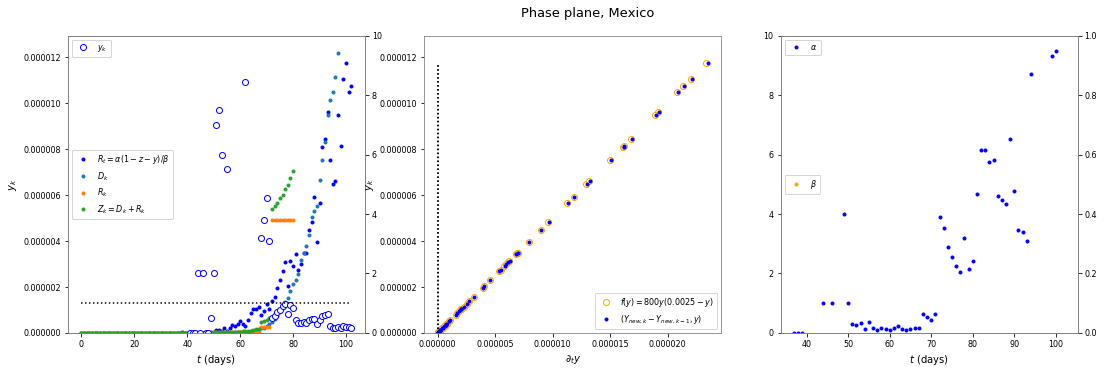

In [68]:
Mexico= getSingleCountryData(G, popSize= Pops_Millions, cou='Mexico')
Mexico= dataSIR_Country(Mexico,a=800, b= 0.0025)
fMexico= plotDataPhasePortraits(Mexico)